# Pass Map Generator

### Use this module with JSON data and a player name to create pass maps easily

In [11]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

%matplotlib inline


def passMapGenerator(jsonName, playerName, matchName):
    
    with open(jsonName,'r') as f:
        data = json.load(f) #loads json in form of dictionaries 
        f.close()
       
    passData = []
    eventData = []
    
    #Created in the order of the lists created
    player = "" 
    startLocation = [] 
    endLocation = []
    complete = True

    #JSON Data is from StatsBomb open-source data, find JSON structure in Pass-Map-Trials

    for i in range(0, len(data)):
        if("pass" in data[i]):
            startLocation = data[i]["location"]
            endLocation = data[i]["pass"]["end_location"]
            player = data[i]["player"]["name"]
            if("outcome" in data[i]['pass']):
                complete = False
            else:
                complete = True
            eventData = [player, startLocation, endLocation, complete]
            passData.append(eventData)
            
    #My arrays are as such - player name (0), start(x,y) (1), end(x,y) (2), complete (bool) (3
    
    playerPasses = []
    
    for i in range(0, len(passData)):
        if(passData[i][0] == playerName):
            playerPasses.append(passData[i])
            
    
    #Create figure
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")

    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")

    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('off')

    #My arrays are as such - player name (0), start(x,y) (1), end(x,y) (2), complete (bool) (3)
    
    complete = 0
    
    for i in range(0, len(playerPasses)):
        
        if(playerPasses[i][3] == True):
            complete += 1 # for completion percentage 

        xstart = int(playerPasses[i][1][0])
        xend = int(playerPasses[i][2][0])
        ystart = int(playerPasses[i][1][1])
        yend = int(playerPasses[i][2][1])
        if(playerPasses[i][3] == False):
            plt.plot([xstart, xend], [ystart, yend], color = "red")
            plt.plot(xstart, ystart, ".", color = "red")
            plt.plot(xend, yend, "x", color = "red")
        else:
            plt.plot([xstart, xend], [ystart, yend], color = "green")
            plt.plot(xstart, ystart, ".", color = "green")
            plt.plot(xend, yend, "x", color = "green")

    title = playerName + ", " + matchName
    ax.text(2,95, title ,color="black",size="14")
    
    # some code for pass statistics - simple completion percentage
    stats = []
    stats.append(complete)
    stats.append(len(playerPasses))
    stats.append(int(complete/len(playerPasses)*100))
    
    #Put this on the plot 
    percentageText = f"{stats[0]}/{stats[1]}, {stats[2]}% "
    ax.text(102, 84, percentageText, color = "black", size = "12")
    
    plt.show()


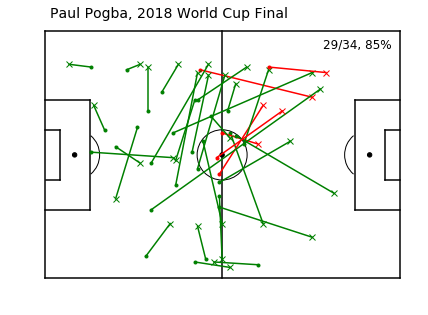

In [12]:
#to use the generator 

passMapGenerator("8658.json", "Paul Pogba", "2018 World Cup Final")
